In [19]:
import numpy as np
from tensorflow.keras.datasets import imdb 

max_features = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print("Тренировочный сет: %d" % len(x_train))
print("Тестовый сет: %d" % len(x_test))

Тренировочный сет: 25000
Тестовый сет: 25000


Выходной вектор содержит одно значение, которое может быть 0 для отрицательного обзора или 1 для положительного обзора. 

Мы определяем функцию, которая позволяет нам реконструировать предложение, начиная с индексов. 

Для этого нам нужен словарь, который сопоставляет слова с индексами, мы можем получить его с помощью метода .get_word_index().

In [21]:
word_index = imdb.get_word_index()

Индексы слов смещены на 3, потому что 0, 1 и 2 являются зарезервированными индексами для "заполнения", "начала последовательности" и "неизвестно".

In [27]:
index_word = dict([(value, key) for (key, value) in word_index.items()])

def vec_to_text(x):
  text = [index_word.get(i-3,'?') for i in x]
  return " ".join(text)
  
vec_to_text(x_test[0])

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

Отзывы будут иметь разную длину, мы рассчитаем длину самого длинного и самого короткого.

In [29]:
longest_review = max(x_train,key=len)
shortest_review = min(x_train,key=len)

print("Самый длинный обзор имеет %d слов" % len(longest_review))
print("Самый короткий обзор имеет %d слов" % len(shortest_review))

Самый длинный обзор имеет 2494 слов
Самый короткий обзор имеет 11 слов


Мы должны сделать каждое предложение одинаковой длины, для этого мы можем использовать функцию Keras pad_sequences (text), которая уменьшает все предложения до заданной длины, усекая слишком длинные и добавляя нули к слишком коротким. Будем использовать общую длину в 50 слов.

In [43]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences

maxlen = 50

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

x_train.shape

(25000, 50)

### Создаем модель

In [50]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN,LSTM
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Embedding(max_features, 50, input_length=maxlen))
model.add(SimpleRNN(32))
# или можем использовать (вместо SimpleRNN):
# model.add(LSTM(16,dropout=0.5,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 50)            500000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 502,689
Trainable params: 502,689
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=512, 
                    validation_split=0.2, 
                    epochs=8)

Epoch 1/8
40/40 [==============================] - 4s 63ms/step - loss: 0.6524 - accuracy: 0.6116 - val_loss: 0.5749 - val_accuracy: 0.6924
Epoch 2/8
40/40 [==============================] - 2s 61ms/step - loss: 0.5064 - accuracy: 0.7655 - val_loss: 0.5280 - val_accuracy: 0.7414
Epoch 3/8
40/40 [==============================] - 2s 44ms/step - loss: 0.4167 - accuracy: 0.8223 - val_loss: 0.4449 - val_accuracy: 0.7932
Epoch 4/8
40/40 [==============================] - 2s 45ms/step - loss: 0.3613 - accuracy: 0.8521 - val_loss: 0.4739 - val_accuracy: 0.7848
Epoch 5/8
40/40 [==============================] - 2s 45ms/step - loss: 0.3100 - accuracy: 0.8778 - val_loss: 0.5406 - val_accuracy: 0.7418
Epoch 6/8
40/40 [==============================] - 2s 45ms/step - loss: 0.2654 - accuracy: 0.8993 - val_loss: 0.5317 - val_accuracy: 0.7732
Epoch 7/8
40/40 [==============================] - 2s 45ms/step - loss: 0.2176 - accuracy: 0.9222 - val_loss: 0.5085 - val_accuracy: 0.7686
Epoch 8/8
40/40 [===

In [52]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 6ms/step - loss: 0.5366 - accuracy: 0.7795


[0.5366001725196838, 0.77947998046875]

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

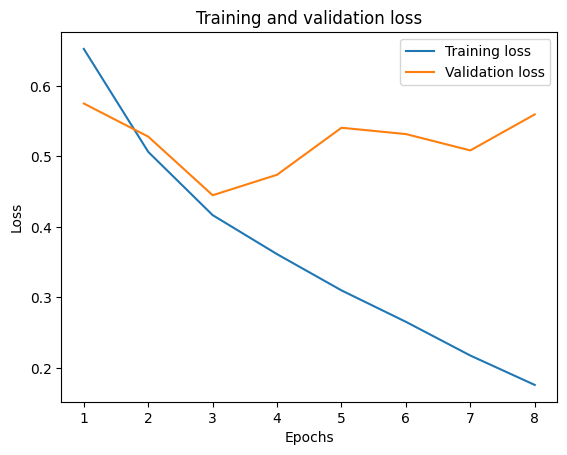

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')

plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

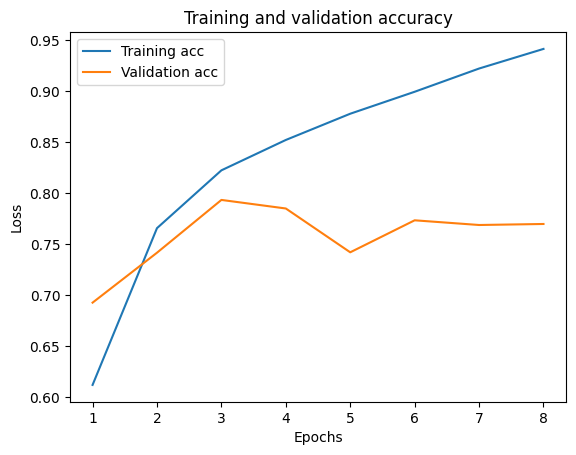

In [56]:
plt.clf() 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()